# K-Nearest Neighbors

K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

## Introduction

The **K-Nearest Neighbor** algorithm classifies an observation based on the class of its nearest neighbors. The underlying assumption is a new observation would belong to the same class as majority of its K nearest neighbors. The number of nearest neighbors to consider is specified by the __K__.

Let's understand with an example - 

In the visual below - the red star is a new observation, yellow dots are in Class A, and purple dots are in Class B.

- If we take K as 3 then the new observation (red star) would belong to Class B (because 2 out of 3 nearest neighbors belong to Class B)
- If we take K as 6 then the new observation (red star) would belong to Class A (because 4 out of 6 nearest neighbors belong to Class A)

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" width="500" height="300" align="left">

Hopefully from this diagram, you should get a sense of what is K-Nearest Neighbors algorithm. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

Also, the value of K has an important role to play. 

Here's a great video (with a Game of Thrones example!) that will help you understand KNN -

In [1]:
## Run this cell (shift+enter) to see the video

from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/MDniRwXizWo", width="814", height="509")

## Proximity or Distance Measure

Imagine each observation (row) in our dataset as a point in n-dimensional space. Where n is the number of columns or attributes/features we have. We could imagine our observations in this n-dimensional space just like points in a cartesian coordinate system. Each axis standing for one feature or attribute. So to understand how similar or dissimilar two observations are we have to calculate the distance between them!

You must have observed in the video that we need a proximity or a distance measure to calculate the distance between observations/data points. 

The most common distance measure used in the industry is called the Euclidean Distance. Let's look at a few progressive examples to understand the concept of Euclidean Distance.

1. If we consider two points in **one dimension** - the distance between them is calculated as the difference between them.

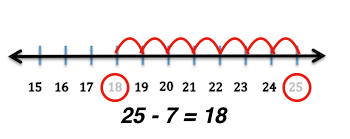

2. In a **two dimensional** space the distance between two points is calculated like this - 

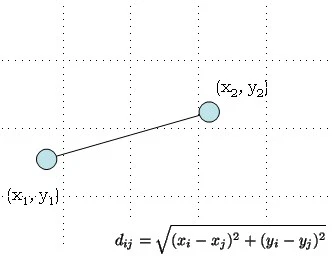

3. By the same logic, the distance between two points in **three dimensions** will be - 

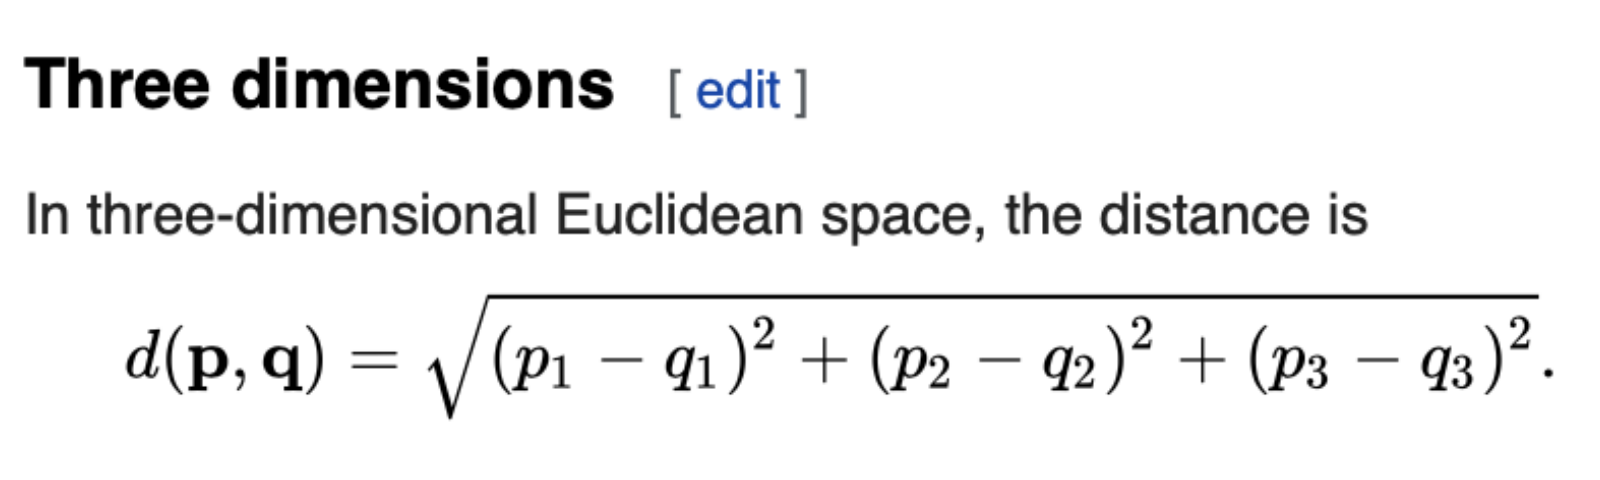

If we extend this logic to n dimensions - the generic equation would look like this - 

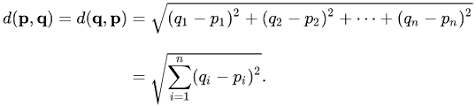

## Project - Telecom Customer Segmentation with KNN

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The project focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Data Loading and Analysis 

In [8]:
cust_df = pd.read_csv('../data/teleCust1000t.csv')
cust_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


We know __custcat__ column specifies which category/class the customer belongs to. Let’s see how many of each class is in our data set. 

In [9]:
cust_df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

- 281 Plus Service
- 266 Basic-service
- 236 Total Service
- 217 E-Service customers

You can easily explore your data using visualization techniques:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa69d0aae10>]],
      dtype=object)

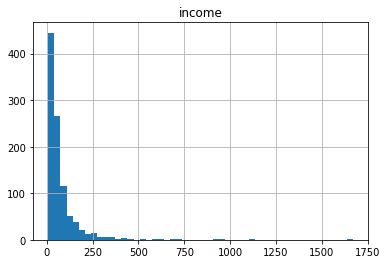

In [10]:
cust_df.hist(column='income', bins=50)

## Data Selection and Preparation

### Segregating the feature set and the labels

Let's look at all the columns/features of our dataset

In [13]:
cust_df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

We can see that all columns except the **custcat** are input variables while **custcat** is our target variable. 

Let's segregate our features.

In [15]:
features = cust_df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
features.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


The **custcat** column contains our labels (categorization) - 

In [24]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalize Data 

Wondering why do we normalize data? Here you go - 

In [2]:
## Run this cell (shift+enter) to see the video

from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/kVgjG3KE654", width="600", height="400")

We will start by converting the `features` dataframe to a numpy array. This will make it easier for us to normalize our data - 

In [16]:
X = features.values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Now we can normalize the feature set. We will use the __StandardScaler__ to transform our features by scaling each feature to a given range. 

Data normalization is good practice, especially for algorithms such as KNN which is based on distance between observations:

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

### Train the model

We know how important the value of K is. Lets start the algorithm with K=4 for now:

In [26]:
K = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Make Predictions
we can use the model to predict the test set:

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

## Evaluate Accuracy
In multilabel classification, __accuracy classification score__ function computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how the actual labels and predicted labels are in the test set are matching.

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Let's try this one more time. But, this time with K=6, let's see if the accuracy changes.

In [29]:
# write your code here
K = 6
neigh6 = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))



Train set Accuracy:  0.51625
Test set Accuracy:  0.31


The accuracy did change but not for good.

#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by User. So, how do we choose the right K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose K=1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the K, and see which K is the best for your model.

We can calucalte the accuracy of KNN for different Ks.

In [30]:
Ks = 10 
mean_acc = np.zeros((Ks-1))
mean_acc_train = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): # we will test for a series of K values from 1 to 9
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    # Calculate the accuracy scores for each value of K
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train, neigh.predict(X_train))

    
#     std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(mean_acc_train)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[1.      0.6175  0.56875 0.5475  0.5375  0.51625 0.5125  0.4925  0.5025 ]


Let's check what was the best accuracy we got and what was the value of K (number of neighbors) for it?

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


Let's Plot  model accuracy  for different number of Neighbors 

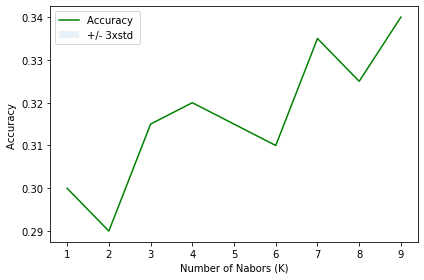

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

As expected the graph demonstrates the best accuracy is at K=9.